In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
help(cv2.MSER_create)

Help on built-in function MSER_create:

MSER_create(...)
    MSER_create([, _delta[, _min_area[, _max_area[, _max_variation[, _min_diversity[, _max_evolution[, _area_threshold[, _min_margin[, _edge_blur_size]]]]]]]]]) -> retval
    .   @brief Full consturctor for %MSER detector
    .   
    .   @param _delta it compares \f$(size_{i}-size_{i-delta})/size_{i-delta}\f$
    .   @param _min_area prune the area which smaller than minArea
    .   @param _max_area prune the area which bigger than maxArea
    .   @param _max_variation prune the area have simliar size to its children
    .   @param _min_diversity for color image, trace back to cut off mser with diversity less than min_diversity
    .   @param _max_evolution  for color image, the evolution steps
    .   @param _area_threshold for color image, the area threshold to cause re-initialize
    .   @param _min_margin for color image, ignore too small margin
    .   @param _edge_blur_size for color image, the aperture size for edge blur


In [2]:
#Create MSER object
mser = cv2.MSER_create()

#Your image path i-e receipt path
img = cv2.imread('doc.png')

#Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()

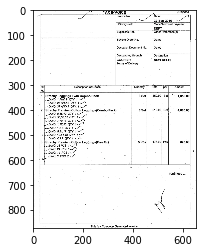

In [3]:
plt.imshow(img, "gray");

In [ ]:
#detect regions in gray scale image
regions, _ = mser.detectRegions(gray)

In [ ]:
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

cv2.polylines(vis, hulls, 1, (0, 255, 0))

cv2.imshow('img', vis)

cv2.waitKey(0)

mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("text only", text_only)

cv2.waitKey(0)